<a href="https://colab.research.google.com/github/isa135/python-coding/blob/main/wordcloud_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# importar os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


https://sigmoidal.ai/como-criar-uma-wordcloud-em-python/

In [26]:
# importar o arquivo csv em um df
df = pd.read_csv("http://dl.dropboxusercontent.com/s/fdzigk974zbx2de/listings.csv?dl=0")
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20190715155027,2019-07-16,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for Carni...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for Carni...,none,This is the best spot in Rio. Everything happe...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.13
1,25026,https://www.airbnb.com/rooms/25026,20190715155027,2019-07-16,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,f,f,strict_14_with_grace_period,t,t,3,3,0,0,2.09
2,31560,https://www.airbnb.com/rooms/31560,20190715155027,2019-07-16,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.37
3,35636,https://www.airbnb.com/rooms/35636,20190715155027,2019-07-16,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,2.29
4,35764,https://www.airbnb.com/rooms/35764,20190715155027,2019-07-16,COPACABANA SEA BREEZE - RIO,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,none,Our guests will experience living with a local...,...,t,f,strict_14_with_grace_period,f,t,1,1,0,0,2.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35446,36733816,https://www.airbnb.com/rooms/36733816,20190715155027,2019-07-16,Room in excellent location - Barra da Tijuca RJ,"Single room with a single mattress, can be pla...","The apartment has two bathrooms, so one is res...","Single room with a single mattress, can be pla...",none,It's in the general description. ' (Hidden by ...,...,t,f,flexible,f,f,1,0,1,0,NaN
35447,36736239,https://www.airbnb.com/rooms/36736239,20190715155027,2019-07-16,Feng Shui Leblon home,Moro sozinha com dois gatos carinhosos e manso...,Tudo é conversado e o hóspede tem acesso à cas...,Moro sozinha com dois gatos carinhosos e manso...,none,"O Leblon é considerado o bairro mais desejado,...",...,f,f,flexible,f,f,12,11,1,0,NaN
35448,36740918,https://www.airbnb.com/rooms/36740918,20190715155027,2019-07-16,Coach House Cottage,"This apartment comes with 2 bedrooms, a flat-s...",NaN,"This apartment comes with 2 bedrooms, a flat-s...",none,NaN,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN
35449,36751290,https://www.airbnb.com/rooms/36751290,20190715155027,2019-07-16,"Minha casa, sua casa!",Nosso apartamento é aconchegante e funcional. ...,"Nós somos um casal jovem , e temos um gatinho ...",Nosso apartamento é aconchegante e funcional. ...,none,"No meu bairro e entorno temos : o Riocentro, o...",...,f,f,flexible,f,f,1,0,1,0,NaN


In [34]:
df_teste = pd.read_csv("wordcloud1.csv")
df_teste

,Input
0,Banco
1,Teste
2,consorcio
3,Teste consorcio
4,frances
5,francês
6,Prova
7,teste; sas
8,pagamento consórcio
9,Pagamento boleto


In [28]:
# eliminar as colunas com valores ausentes
summary = df.dropna(subset=['summary'], axis=0)['summary']
summary

0        Please note that special rates apply for Carni...
1        Our apartment is a little gem, everyone loves ...
2        This nice and clean 1 bedroom apartment is loc...
3        This cosy apartment  is just a few steps away ...
4        Our newly renovated studio is located in the b...
                               ...                        
35446    Single room with a single mattress, can be pla...
35447    Moro sozinha com dois gatos carinhosos e manso...
35448    This apartment comes with 2 bedrooms, a flat-s...
35449    Nosso apartamento é aconchegante e funcional. ...
35450    Condomínio com segurança 24hrs por dia Mercado...
Name: summary, Length: 33704, dtype: object

In [35]:
# eliminar as colunas com valores ausentes
input_usuario = df_teste.dropna(subset=['Input'], axis=0)['Input']
input_usuario

0                   Banco
1                   Teste
2               consorcio
3         Teste consorcio
4                 frances
5                 francês
6                   Prova
7              teste; sas
8     pagamento consórcio
9        Pagamento boleto
10        Pagar consórcio
11        Pagar consorcio
12       Boleto consórcio
13                 Boleto
14      Quero pagar teste
15           Apsiodaps d;
16             Pascida sp
Name: Input, dtype: object

# Nova seção

In [30]:
# exemplos de descrições para os imóveis no Airbnb
display(input_usuario.iloc[1])
display(summary.iloc[120])
display(summary.iloc[133])

'Teste'

'O quarto é lindo e bem grande e possui acesso para a varanda do apartamento. Possui grandes armários,  bancada. Esse é o quarto maior de um apartamento/cobertura de 150m2 que possui 3 quartos, sala, varandas em torno de todo o apartamento, cozinha ampla com dependências. Esse quarto não possui banheiro privativo. Os hospedes desse quarto compartilham o banheiro com as pessoas que estiverem utilizando o segundo quarto. O terceiro quarto é a suíte que normalmente é utilizada por mim e meu marido.'

'Aconchegante, amplo, básico, arejado, iluminado com luz natural em prédio seguro e familiar. Prédio com portaria 24 horas e cameras de segurança em todos os andares do edifício. Tudo isto em Copacabana a quase 1 quadra do mar! É o segundo prédio da segunda quadra da praia!!! Está localizado na Av. Prado Junior quase esquina com Av. N.Sra de Copacabana!'

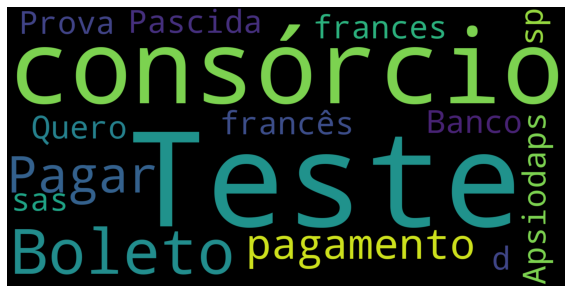

In [36]:
# concatenar as palavras
all_summary = " ".join(s for s in input_usuario)
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "consorcio"])
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")